In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


## Load Dataset

In [2]:
data = pd.read_csv("IO 2010 Sulawesi Selatan.csv")
data.head()

,Unnamed: 0,Unnamed: 1,1,2,3,4,5,6,7,8,...,302,303,304,305,309,310,409,509,600,700
0,Padi,1,860269.596200,0.000000,0.000000,10359.337980,0.000000,0.000000,0.0,0.000000,...,0.0,0.0000,0.000000,0.000000e+00,0.000000e+00,1.124889e+07,0.0,0.0,1.124889e+07,1.124889e+07
1,Tanaman bahan makanan lainnya,2,0.000000,582084.149900,0.000000,182189.380600,0.000000,2456.429353,0.0,0.000000,...,0.0,0.0000,27830.707960,8.878554e+05,5.390295e+06,7.288266e+06,0.0,0.0,7.288266e+06,7.288266e+06
2,Tanaman perkebunan,3,0.901156,3531.156853,644018.173500,49761.165470,0.000000,0.000000,0.0,0.000000,...,0.0,0.0000,3412.477837,4.821600e+06,5.352460e+06,9.183128e+06,0.0,0.0,9.183128e+06,9.183128e+06
3,Peternakan dan hasil-hasilnya,4,100432.730100,204951.991000,40607.181690,85817.333650,0.000000,330.516666,0.0,0.000000,...,0.0,135804.8442,8884.349717,1.654981e+05,1.129234e+06,2.166391e+06,0.0,0.0,2.166391e+06,2.166391e+06
4,Kehutanan,5,55.120636,372.029473,971.848231,48.555593,137.652127,1281.859853,0.0,33.713091,...,0.0,0.0000,905.531144,3.540820e+04,7.836585e+04,1.529393e+05,0.0,0.0,1.529393e+05,1.529393e+05


In [3]:
data.tail()

,Unnamed: 0,Unnamed: 1,1,2,3,4,5,6,7,8,...,302,303,304,305,309,310,409,509,600,700
39,Penyusutan,203,1.452299e+05,2.587877e+04,1.147662e+05,2.883109e+04,5119.723838,2.872259e+05,10511.751150,8.300689e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,Pajak Tak Langsung,204,6.937260e+04,5.641550e+04,3.815486e+04,1.665497e+04,1064.637014,6.872361e+04,2272.474521,3.013393e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Subsidi,205,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,Nilai Tambah Bruto,209,8.658558e+06,6.108251e+06,6.305311e+06,1.541825e+06,122502.675300,7.705983e+06,218219.567500,6.901461e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,Jumlah Input,210,1.124889e+07,7.288266e+06,9.183128e+06,2.166391e+06,152939.335200,8.630996e+06,341949.506400,1.032085e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.rename( columns={'Unnamed: 0':'Sektor', 'Unnamed: 1':'Kode'}, inplace=True )
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 49 columns):
Sektor    44 non-null object
Kode      44 non-null int64
1         44 non-null float64
2         44 non-null float64
3         44 non-null float64
4         44 non-null float64
5         44 non-null float64
6         44 non-null float64
7         44 non-null float64
8         44 non-null float64
9         44 non-null int64
10        44 non-null float64
11        44 non-null float64
12        44 non-null float64
13        44 non-null float64
14        44 non-null float64
15        44 non-null float64
16        44 non-null float64
17        44 non-null float64
18        44 non-null float64
19        44 non-null float64
20        44 non-null float64
21        44 non-null float64
22        44 non-null float64
23        44 non-null float64
24        44 non-null float64
25        44 non-null float64
26        44 non-null float64
27        44 non-null float64
28        44 non-null float64
29

## Matrix A

In [5]:
a = data.iloc[:35, :37]
del a["Sektor"] , a["Kode"]
a.tail()

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
30,3743.743622,12615.745520,19866.223940,4997.007998,520.528403,12308.320550,3034.314396,402704.377700,0,5178.198506,...,105917.39100,138251.392700,34613.14768,2326.477078,2810.614248,334696.754300,72981.91809,4.066154e+04,4.254848e+05,2893.575190
31,1185.584115,5772.949342,4722.638898,1515.836749,215.115812,5152.120281,263.303981,12983.477990,0,1704.741704,...,50763.07169,242383.421600,16207.09331,70074.130360,44552.119400,87720.902270,273359.20490,4.605670e+04,1.214648e+06,3722.121816
32,173531.401300,65510.072460,231213.093300,9226.947703,7973.510287,96451.519420,86609.491590,79132.710210,0,315.907155,...,350474.01410,791182.442200,9624.00534,186209.002000,17643.794460,77181.600910,70381.48052,1.025157e+06,2.720107e+05,39668.729670
33,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,1.560871e-01,0.000000e+00,0.000000
34,2015.786614,1896.493266,7867.852625,847.263499,730.432787,650.642870,562.535946,2966.602608,0,33.977372,...,13833.95433,9494.223231,851.43087,125043.301700,434.577375,3013.151661,15069.10638,1.965451e+04,2.954665e+04,12663.464620


In [6]:
jumlah = data.iloc[-1:, :37]
del jumlah["Sektor"] , jumlah["Kode"]
jumlah.head()

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
43,11248891.52,7288265.63,9183127.86,2166391.208,152939.3352,8630995.631,341949.5064,10320846.52,0,663934.8121,...,20981684.9,20833083.38,4930711.36,6189809.316,1853847.917,4145553.939,3035967.829,9565159.283,32627340.14,1032523.337


In [7]:
aa = np.array(a)
bb = np.array(jumlah)
aa , bb

(array([[8.60269596e+05, 0.00000000e+00, 0.00000000e+00, ...,
         3.99480628e+02, 1.87270591e+02, 9.11954677e+00],
        [0.00000000e+00, 5.82084150e+05, 0.00000000e+00, ...,
         2.70570670e+03, 1.04214573e+05, 1.49737588e+04],
        [9.01156375e-01, 3.53115685e+03, 6.44018174e+05, ...,
         2.47815250e+01, 6.73316928e+03, 2.76412648e+03],
        ...,
        [1.73531401e+05, 6.55100725e+04, 2.31213093e+05, ...,
         1.02515650e+06, 2.72010730e+05, 3.96687297e+04],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.56087110e-01, 0.00000000e+00, 0.00000000e+00],
        [2.01578661e+03, 1.89649327e+03, 7.86785263e+03, ...,
         1.96545126e+04, 2.95466451e+04, 1.26634646e+04]]),
 array([[1.12488915e+07, 7.28826563e+06, 9.18312786e+06, 2.16639121e+06,
         1.52939335e+05, 8.63099563e+06, 3.41949506e+05, 1.03208465e+07,
         0.00000000e+00, 6.63934812e+05, 4.19455999e+06, 2.61105087e+07,
         2.97457171e+05, 1.11495822e+05, 2.750

In [8]:
matrix_a = np.divide(aa,bb, out=np.zeros_like(aa), where=bb!=0)
matrix_a 

array([[7.64759438e-02, 0.00000000e+00, 0.00000000e+00, ...,
        4.17641375e-05, 5.73968305e-06, 8.83229119e-06],
       [0.00000000e+00, 7.98659351e-02, 0.00000000e+00, ...,
        2.82871056e-04, 3.19408731e-03, 1.45021020e-02],
       [8.01106823e-08, 4.84498924e-04, 7.01305899e-02, ...,
        2.59081153e-06, 2.06365865e-04, 2.67705957e-03],
       ...,
       [1.54265334e-02, 8.98843096e-03, 2.51780327e-02, ...,
        1.07176104e-01, 8.33689564e-03, 3.84192088e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.63182970e-08, 0.00000000e+00, 0.00000000e+00],
       [1.79198689e-04, 2.60211875e-04, 8.56772632e-04, ...,
        2.05480243e-03, 9.05579340e-04, 1.22645796e-02]])

In [9]:
# Make identity matrix
identitas = np.identity(35, dtype = None)
identitas

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [10]:
i_a = np.subtract(identitas,matrix_a)
i_a

array([[ 9.23524056e-01,  0.00000000e+00,  0.00000000e+00, ...,
        -4.17641375e-05, -5.73968305e-06, -8.83229119e-06],
       [ 0.00000000e+00,  9.20134065e-01,  0.00000000e+00, ...,
        -2.82871056e-04, -3.19408731e-03, -1.45021020e-02],
       [-8.01106823e-08, -4.84498924e-04,  9.29869410e-01, ...,
        -2.59081153e-06, -2.06365865e-04, -2.67705957e-03],
       ...,
       [-1.54265334e-02, -8.98843096e-03, -2.51780327e-02, ...,
         8.92823896e-01, -8.33689564e-03, -3.84192088e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.63182970e-08,  1.00000000e+00,  0.00000000e+00],
       [-1.79198689e-04, -2.60211875e-04, -8.56772632e-04, ...,
        -2.05480243e-03, -9.05579340e-04,  9.87735420e-01]])

In [11]:
BL = np.linalg.inv(i_a)
BL

array([[1.08306502e+00, 1.08156128e-03, 9.85669645e-04, ...,
        1.27808660e-03, 7.34399193e-03, 2.26223008e-02],
       [9.63991943e-04, 1.08992357e+00, 6.92688144e-04, ...,
        8.83637423e-04, 5.22606966e-03, 1.91518173e-02],
       [3.50311515e-04, 1.76103563e-03, 1.07592503e+00, ...,
        5.10323278e-04, 2.77404332e-03, 1.06846744e-02],
       ...,
       [1.93033939e-02, 1.30455340e-02, 3.20991730e-02, ...,
        1.12377997e+00, 1.51431530e-02, 5.02245799e-02],
       [3.14998515e-10, 2.12880899e-10, 5.23803838e-10, ...,
        1.83381753e-08, 1.00000000e+00, 8.19579612e-10],
       [3.08534085e-04, 5.15573268e-04, 1.29236451e-03, ...,
        2.64265738e-03, 1.78096443e-03, 1.01296065e+00]])

In [12]:
BL_per_sector = BL.sum(axis=0)
BL_per_sector

array([1.12898873, 1.19278679, 1.16859745, 1.32095795, 1.17796072,
       1.11744987, 1.36988881, 1.15449775, 1.        , 2.07298305,
       1.63980431, 2.08485381, 1.68275855, 1.15895186, 1.24327345,
       1.47669623, 1.30152716, 1.28498265, 1.29659551, 1.54268328,
       1.45688727, 1.17262839, 1.09625717, 1.04495475, 1.20499074,
       1.69910175, 1.13763834, 1.93699058, 1.30898812, 1.43124216,
       1.50095096, 1.35403222, 1.25378148, 1.2438781 , 1.31527985])

In [13]:
BL_per_sector1 = BL.sum(axis=1)
BL_per_sector1

array([1.80932045, 1.32594018, 2.5109168 , 1.2368494 , 1.04007626,
       1.65243767, 1.1995261 , 1.08113728, 1.        , 1.07807465,
       1.03571423, 1.67282158, 1.29389469, 1.01039905, 1.15862068,
       1.37989816, 1.00705764, 1.00623092, 1.38821531, 1.85005716,
       1.06874103, 1.00005464, 1.06782472, 1.06018684, 1.90087738,
       1.24837574, 2.19403185, 1.32974621, 1.59489598, 1.14082179,
       1.33555534, 1.3658676 , 2.44009373, 1.00000004, 1.08957868])

In [14]:
np.mean(BL_per_sector)

1.3592525658875794

In [15]:
np.mean(BL_per_sector1)

1.3592525658875796

# DBL

In [16]:
dbl = BL_per_sector / np.mean(BL_per_sector)
dbl

array([0.83059525, 0.87753139, 0.85973533, 0.97182671, 0.86662387,
       0.82210613, 1.00782507, 0.8493622 , 0.73569845, 1.52509041,
       1.20640148, 1.53382371, 1.23800285, 0.85263908, 0.91467434,
       1.08640312, 0.95753151, 0.94535974, 0.9539033 , 1.13494969,
       1.0718297 , 0.86270088, 0.80651469, 0.76877159, 0.88650982,
       1.25002651, 0.83695876, 1.42504096, 0.96302053, 1.05296263,
       1.10424729, 0.9961594 , 0.92240509, 0.91511918, 0.96764934])

# DFL

In [17]:
dfl = BL_per_sector1 / np.mean(BL_per_sector1)
dfl

array([1.33111424, 0.97549213, 1.84727759, 0.90994818, 0.76518249,
       1.21569583, 0.88248949, 0.79539102, 0.73569845, 0.79313785,
       0.76197335, 1.23069224, 0.95191631, 0.74334901, 0.85239543,
       1.01518893, 0.74089074, 0.74028252, 1.02130785, 1.36108417,
       0.78627112, 0.73573864, 0.78559699, 0.77997781, 1.39847254,
       0.91842809, 1.61414583, 0.97829222, 1.1733625 , 0.83930082,
       0.98256599, 1.00486667, 1.79517316, 0.73569847, 0.80160134])

In [18]:
ok = {'ibl': dbl, "ifl": dfl}
gambar = pd.DataFrame(data=ok)
gambar.head()

,ibl,ifl
0,0.830595,1.331114
1,0.877531,0.975492
2,0.859735,1.847278
3,0.971827,0.909948
4,0.866624,0.765182


# Sektor Kunci

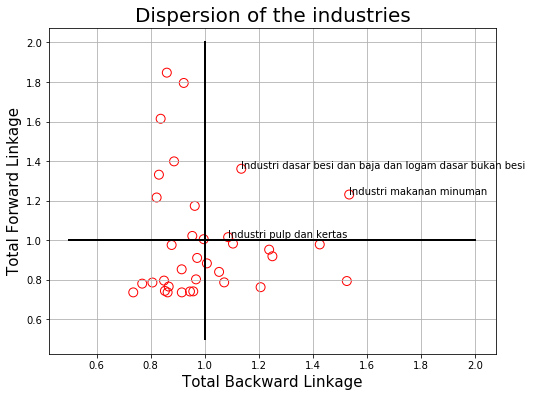

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(gambar.ibl, gambar.ifl, s=80, facecolors='none', edgecolors='r')
plt.plot([1, 1], [0.5, 2], 'k-', lw=2)
plt.plot([.5, 2], [1, 1], 'k-', lw=2)
plt.xlabel("Total Backward Linkage", size=15)
plt.ylabel("Total Forward Linkage", size=15)
plt.title("Dispersion of the industries", size=20)
plt.annotate('Industri makanan minuman', xy=(1.533824, 1.230692))
plt.annotate('Industri pulp dan kertas ', xy=(1.086403, 1.015189))
plt.annotate('Industri dasar besi dan baja dan logam dasar bukan besi ', xy=(1.134950, 1.361084))
plt.grid()
plt.savefig("gambar.png")
plt.show()